# Tamizhiniyan S R

# TASK-1: Prediction using Supervised ML

# Imports

In [70]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [71]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [87]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [78]:
import plotly.express as px
fig=px.scatter(x=df['Hours'], y=df['Scores'])
fig.show()

In [79]:
fig = go.Figure(data=go.Scatter(
    y = df['Scores'],x=df['Hours'],
    mode='markers',
    marker=dict(
        color=df['Scores'], #set color equal to a variable
        colorscale='Bluered', # one of plotly colorscales
        showscale=True
    )
))

fig.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)


In [116]:
X_train,y_train

(array([[6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41]))

In [92]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

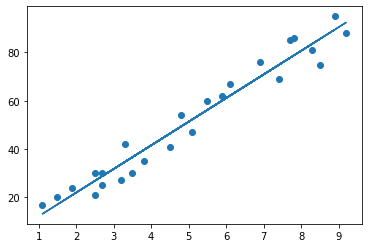

In [93]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [107]:

L=[]
x=[]
for i in range(len(y)):
    L.append(line[i][0])
    x.append(X[i][0])
fig = go.Figure()
fig.add_trace(go.Scatter(
    y = df['Scores'],x=df['Hours'],
    mode='markers',
    marker=dict(
        color=df['Scores'], #set color equal to a variable
        colorscale='Bluered', # one of plotly colorscales
    )
))
fig.add_trace(go.Scatter(
    y = L,x=x,

    marker=dict(
        colorscale='Cividis', # one of plotly colorscales
    )
))
fig.show()

In [108]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [109]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [114]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


In [115]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652
